# Convolution neural network

In [3]:
import tensorflow as tf

C:\Users\Acer\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

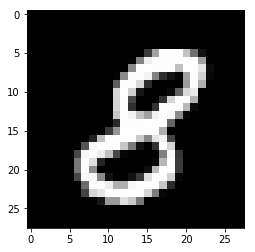

In [13]:
plt.imshow(mnist.train.images[5].reshape(28,28),cmap='gray')

In [71]:
def init_weights(shape):
    init_random_dist=tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(init_random_dist)

In [72]:
def init_bias(shape):
    init_bias_vals=tf.constant(0.1,shape=shape)
    return tf.Variable(init_bias_vals)

In [73]:
def conv2d(x,W):         #DESIGN CONVOLUTION NETWORK
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

In [74]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [100]:
#create a cnn and call above methods
def convolutional_layer(input_x,shape):
    W=init_weights(shape)
    b=init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x,W)+b)
        

In [101]:
def normal_full_layer(input_layer,size):
    input_size=int(input_layer.get_shape()[1])
    W=init_weights([input_size,size])
    b=init_bias([size])
    return tf.matmul(input_layer,W)+b


In [102]:
x=tf.placeholder(tf.float32,shape=[None,784])

In [103]:
y_true=tf.placeholder(tf.float32,shape=[None,10])

In [104]:
x_image=tf.reshape(x,[-1,28,28,1])


In [105]:
convo_1=convolutional_layer(x_image,shape=[6,6,1,32])
convo_1_pooling=max_pool_2by2(convo_1)

In [106]:
convo_2=convolutional_layer(convo_1,shape=[6,6,32,64])
convo_2_pooling=max_pool_2by2(convo_2)

In [112]:
convo_2_flat=tf.reshape(convo_2_pooling,[-1,7*7*64])
full_layer_one=tf.nn.relu(normal_full_layer(convo_2_flat,1024))

In [114]:
hold_prob=tf.placeholder(tf.float32)
full_one_dropout=tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

In [115]:
y_pred=normal_full_layer(full_one_dropout,10)

In [116]:
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [118]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.0001)
train=optimizer.minimize(cross_entropy)

In [119]:
init=tf.global_variables_initializer()

In [123]:
steps=5000
with tf.Session() as sess:
    sess.run(init)
    for i in range(steps):
        batch_x,batch_y=mnist.train.next_batch(50)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
        
    matches=tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))#argmax will compare with the index value if its equals then the acc value is 1 if not then 0 whch will then calculate mean of the whole column and give value to the false coulmn
    print(sess.run(matches,feed_dict={x:batch_x,y_true:batch_y}))   #will provide the values which didnt match
    acc=tf.reduce_mean(tf.cast(matches,tf.float32))
    print(sess.run(acc,feed_dict={x:batch_x,y_true:batch_y}))
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

InvalidArgumentError: logits and labels must be broadcastable: logits_size=[200,10] labels_size=[50,10]
	 [[Node: softmax_cross_entropy_with_logits_sg = SoftmaxCrossEntropyWithLogits[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](softmax_cross_entropy_with_logits_sg/Reshape, softmax_cross_entropy_with_logits_sg/Reshape_1)]]

Caused by op 'softmax_cross_entropy_with_logits_sg', defined at:
  File "C:\Users\Acer\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Acer\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Acer\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\Users\Acer\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Acer\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\Acer\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Acer\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Acer\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Acer\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Acer\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Acer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Acer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Acer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-116-fcadc5f72f56>", line 1, in <module>
    cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))
  File "C:\Users\Acer\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 250, in new_func
    return func(*args, **kwargs)
  File "C:\Users\Acer\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1959, in softmax_cross_entropy_with_logits
    labels=labels, logits=logits, dim=dim, name=name)
  File "C:\Users\Acer\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1873, in softmax_cross_entropy_with_logits_v2
    precise_logits, labels, name=name)
  File "C:\Users\Acer\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 7168, in softmax_cross_entropy_with_logits
    name=name)
  File "C:\Users\Acer\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Acer\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "C:\Users\Acer\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): logits and labels must be broadcastable: logits_size=[200,10] labels_size=[50,10]
	 [[Node: softmax_cross_entropy_with_logits_sg = SoftmaxCrossEntropyWithLogits[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](softmax_cross_entropy_with_logits_sg/Reshape, softmax_cross_entropy_with_logits_sg/Reshape_1)]]
